## Imports

In [ ]:
import numpy as np
import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

np.random.seed(0)

## Getting the Data

In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


## Visualizing the Data

In [ ]:
# nr_classes = 10
# plt.figure(figsize=(20, 20))

# for i in range(nr_classes):
#   plt.subplot(1, nr_classes, i+1)
#   image = x_train[y_train==i][0]
#   plt.imshow(image, cmap="gray")
#   plt.title(f"Label {i}", fontsize=16)

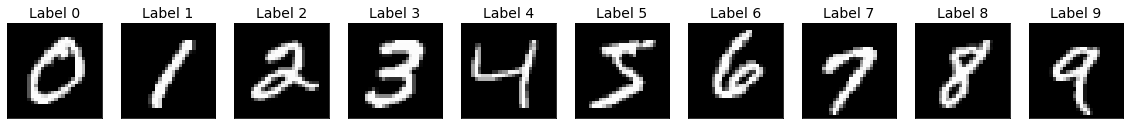

In [ ]:
nr_classes = 10
figure, axes = plt.subplots(1, nr_classes, figsize=(20, 20))

for i in range(nr_classes):
  image = x_train[y_train==i][0]
  axes[i].imshow(image, cmap="gray")
  axes[i].set_title(f"Label {i}", fontsize=14)
  axes[i].set_xticks([])
  axes[i].set_yticks([])

In [ ]:
for i in range(nr_classes):
  print(y_train[i])

5
0
4
1
9
2
1
3
1
4


### One-hot encoding

In [ ]:
# y_train = np.eye(nr_classes)[y_train]
# y_test = np.eye(nr_classes)[y_test]

In [ ]:
y_train = keras.utils.to_categorical(y_train, nr_classes)
y_test = keras.utils.to_categorical(y_test, nr_classes)

In [ ]:
for i in range(nr_classes):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


### Prepare the Data - normalizing

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
# Flattening the data

In [ ]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

In [ ]:
x_train[0].shape

(784,)

## Create Model

In [ ]:
model = Sequential([
    Dense(units=128, input_shape=(784, ), activation="relu"),
    Dense(units=128, activation="relu"),
    Dropout(0.25),
    Dense(units=10, activation="softmax")
])

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


## Training the Model

In [ ]:
batch_size = 512
epochs = 10

model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)


Epoch 1/10
118/118 [==============================] - 5s 4ms/step - loss: 0.6043 - accuracy: 0.8257
Epoch 2/10
118/118 [==============================] - 0s 4ms/step - loss: 0.2224 - accuracy: 0.9361
Epoch 3/10
118/118 [==============================] - 0s 4ms/step - loss: 0.1625 - accuracy: 0.9527
Epoch 4/10
118/118 [==============================] - 0s 4ms/step - loss: 0.1276 - accuracy: 0.9629
Epoch 5/10
118/118 [==============================] - 0s 3ms/step - loss: 0.1047 - accuracy: 0.9684
Epoch 6/10
118/118 [==============================] - 0s 4ms/step - loss: 0.0874 - accuracy: 0.9746
Epoch 7/10
118/118 [==============================] - 1s 5ms/step - loss: 0.0769 - accuracy: 0.9772
Epoch 8/10
118/118 [==============================] - 1s 5ms/step - loss: 0.0681 - accuracy: 0.9795
Epoch 9/10
118/118 [==============================] - 1s 5ms/step - loss: 0.0590 - accuracy: 0.9821
Epoch 10/10
118/118 [==============================] - 1s 5ms/step - loss: 0.0518 - accuracy: 0.9844

## Evaluate

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}\t|Test Accuracy: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0737 - accuracy: 0.9767
Test Loss: 0.07367374002933502	|Test Accuracy: 0.9767000079154968


### Predict

In [ ]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred_classes)

313/313 [==============================] - 0s 1ms/step
[7 2 1 ... 4 5 6]


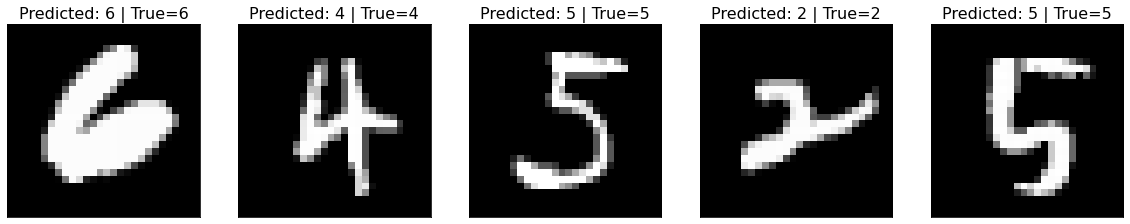

In [ ]:
random_size = 5
figure, axes = plt.subplots(1, random_size, figsize=(20, 20))
y_true = np.argmax(y_test, axis=1)

for i in range(random_size):
  random_idx = np.random.choice(len(x_test))
  x_sample = x_test[random_idx]
  y_sample_true = y_true[random_idx]
  y_sample_pred_class = y_pred_classes[random_idx]

  axes[i].set_title(f"Predicted: {y_sample_pred_class} | True={y_sample_true}", fontsize=16)
  axes[i].imshow(x_sample.reshape(28, 28), cmap="gray")
  axes[i].set_xticks([])
  axes[i].set_yticks([])

## Confusion Matrix

In [ ]:
# conf = confusion_matrix(y_true, y_pred_classes)

# plt.figure(figsize=(10, 10))
# plt.imshow(conf, cmap="Greens")

# plt.title("Confusion Matrix", fontsize=16)
# plt.ylabel("Actual Labels", fontsize=13)
# plt.xlabel("Predicted Labels", fontsize=13)

# LABELS = np.linspace(start=0, stop=9, num=10)
# tick_marks = np.arange(nr_classes)
# plt.yticks(tick_marks, LABELS)
# plt.xticks(tick_marks, LABELS)

# plt.colorbar()

Text(0.5, 1.0, 'Confusion Matrix')

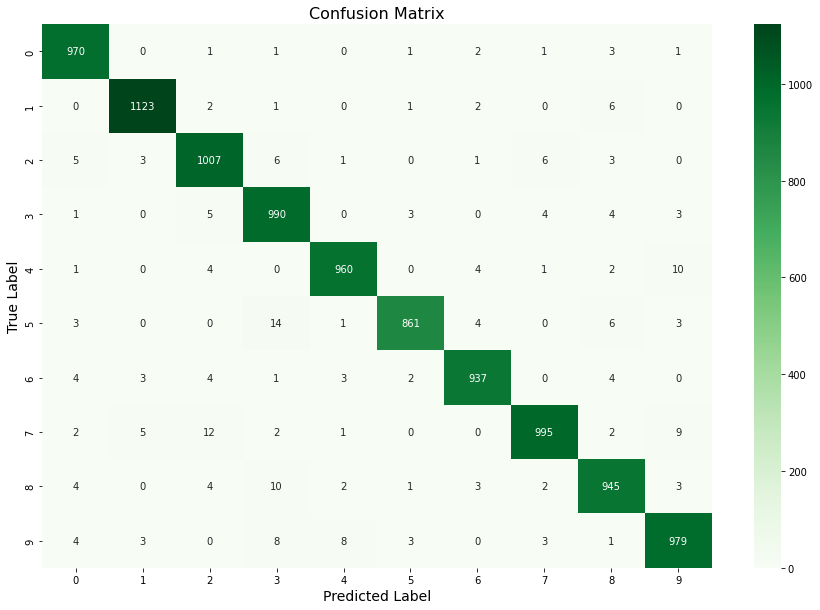

In [ ]:
conf = confusion_matrix(y_true=y_true, y_pred=y_pred_classes)

figure, axes = plt.subplots(figsize=(15, 10))
axes = sns.heatmap(conf, annot=True, fmt="d", cmap="Greens")
axes.set_xlabel("Predicted Label", fontsize=14)
axes.set_ylabel("True Label", fontsize=14)
axes.set_title("Confusion Matrix", fontsize=16)

## Investigate Some Errors

In [ ]:
errors = (y_pred_classes != y_true)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

In [ ]:
y_pred_errors_probability = np.max(y_pred_errors, axis=1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:]

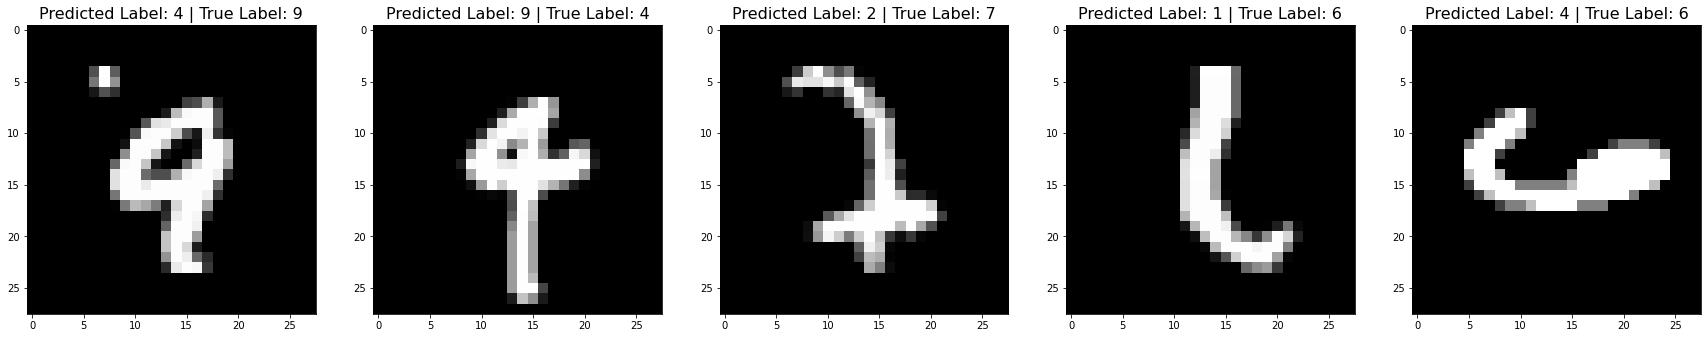

In [ ]:
num = len(top_idx_diff_errors)
figure, axes = plt.subplots(1, num, figsize=(30, 30))

for i in range(num):
  idx = top_idx_diff_errors[i]
  sample = x_test_errors[idx].reshape(28, 28)
  y_t = y_true_errors[idx]
  y_p = y_pred_classes_errors[idx]
  axes[i].imshow(sample, cmap="gray")
  axes[i].set_title(f"Predicted Label: {y_p} | True Label: {y_t}", fontsize=16)

## Saving and Loading Models

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

model_save_path = "/content/drive/MyDrive/_TRAINED_MODELS/mnist_handwritten_digit_classification_model"

Mounted at /content/drive


In [ ]:
model.save(model_save_path)

In [ ]:
loaded_model = keras.models.load_model(model_save_path)
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
